In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading data
survey_data = pd.read_csv("ACME-HappinessSurvey2020.csv")

In [3]:
data = survey_data
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
data.shape

(126, 7)

In [5]:
#checking for null values
data.isna().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [6]:
# Checking if target variable is balanced
data.Y.value_counts()

1    69
0    57
Name: Y, dtype: int64

### <font color='green'>Data has no missing or null values</font> 
### <font color='green'>Target Variable is Balanced</font> 

In [7]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


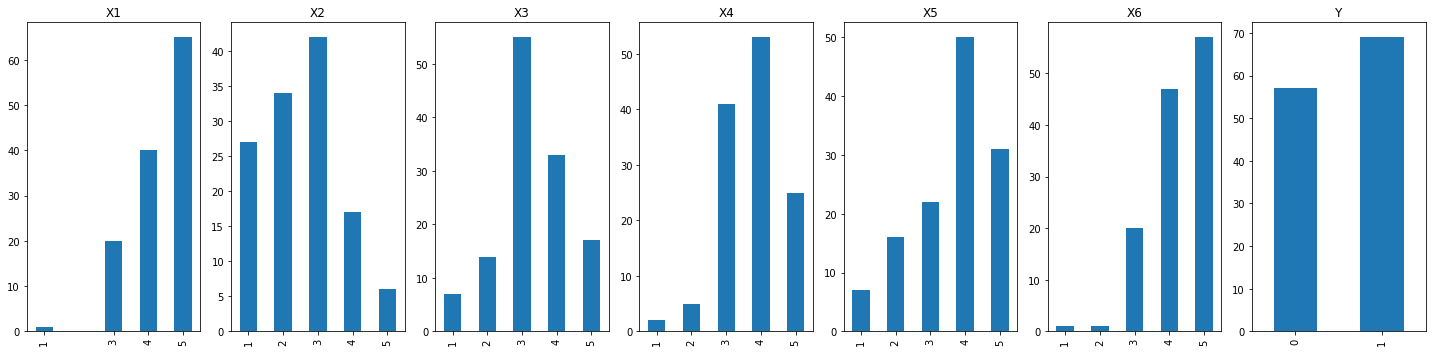

In [8]:
# Checking distribution of the data
fig, (ax1, ax2, ax3, ax4, ax5, ax6, axy) = plt.subplots(1,7, figsize=(20,5))
data.X1.value_counts().plot.bar(ax=ax1, title='X1')
data.X2.value_counts().plot.bar(ax=ax2, title='X2')
data.X3.value_counts().plot.bar(ax=ax3, title='X3')
data.X4.value_counts().plot.bar(ax=ax4, title='X4')
data.X5.value_counts().plot.bar(ax=ax5, title='X5')
data.X6.value_counts().plot.bar(ax=ax6, title='X6')
data.Y.value_counts().plot.bar(ax=axy, title='Y')

plt.tight_layout()    
plt.show()

In [9]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler() 
#scaled_values = scaler.fit_transform(data) 
#data.loc[:,:] = scaled_values

In [10]:
data['log_X1'] = np.log(data['X1'])
data['log_X2'] = np.log(data['X2'])
data['log_X3'] = np.log(data['X3'])
data['log_X4'] = np.log(data['X4'])
data['log_X5'] = np.log(data['X5'])
data['log_X6'] = np.log(data['X6'])

In [11]:
data.head()

,Y,X1,X2,X3,X4,X5,X6,log_X1,log_X2,log_X3,log_X4,log_X5,log_X6
0,0,3,3,3,4,2,4,1.098612,1.098612,1.098612,1.386294,0.693147,1.386294
1,0,3,2,3,5,4,3,1.098612,0.693147,1.098612,1.609438,1.386294,1.098612
2,1,5,3,3,3,3,5,1.609438,1.098612,1.098612,1.098612,1.098612,1.609438
3,0,5,4,3,3,3,5,1.609438,1.386294,1.098612,1.098612,1.098612,1.609438
4,0,5,4,3,3,3,5,1.609438,1.386294,1.098612,1.098612,1.098612,1.609438


In [12]:
data1 = data
data1 = data1.drop(['X1', 'X2', 'X3', 'X4', 'X5', 'X6'], axis =1)

In [13]:
data1.head()

,Y,log_X1,log_X2,log_X3,log_X4,log_X5,log_X6
0,0,1.098612,1.098612,1.098612,1.386294,0.693147,1.386294
1,0,1.098612,0.693147,1.098612,1.609438,1.386294,1.098612
2,1,1.609438,1.098612,1.098612,1.098612,1.098612,1.609438
3,0,1.609438,1.386294,1.098612,1.098612,1.098612,1.609438
4,0,1.609438,1.386294,1.098612,1.098612,1.098612,1.609438


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data1.drop('Y',axis=1), data1.Y , test_size=0.1, random_state=21)

In [19]:
#from sklearn.model_selection import train_test_split
#X_trainv, X_test, y_trainv, y_test = train_test_split(data.drop('Y',axis=1), data.Y , test_size=0.1, random_state=21)
#X_train, X_val, y_train, y_val = train_test_split(X_trainv, y_trainv, test_size=0.15, random_state=21)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc

In [23]:
# function for Confusion matrix, Classification Report and ROC-Curve

def classif_report(Y_test, Y_pred, pred_prob):
    print("\n", "Confusion Matrix")
    c_matrix = confusion_matrix(Y_test, Y_pred)
    ax = sns.heatmap(c_matrix, square = True,  annot=True, cbar=False, fmt = 'g', cmap="RdBu",   
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    #heatmap getting truncated so added below to extend the plot
    b, t = plt.ylim()
    b += 0.5
    t -= 0.5
    custom_ylim = (b, t)
    plt.setp(ax, ylim=custom_ylim)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    print("\n", "Classification Report", "\n")
    print(classification_report(Y_test, Y_pred))
    print("Accuracy: ",accuracy_score(Y_test, Y_pred))
    print("Precision Score: ", precision_score(Y_test, Y_pred))
    print("Recall Score: ", recall_score(Y_test, Y_pred))
    print("F1 Score: ", f1_score(Y_test, Y_pred))
    pred_prob_one = pred_prob[:,1]
    fpr, tpr, thresholds = roc_curve(Y_test, pred_prob_one)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC Curve (Area = %0.2f)' % roc_auc)
    plt.plot([0.0, 1.0], [0, 1],'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC on Test Data')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")

In [24]:
#function to run different models

def model_data(XTr, XTe, YTr, YTe):
    
    print("\n", "Logistic Regression")
    clf_model = LogisticRegression()
    clf_model.fit(XTr, YTr)
    Y_pred = clf_model.predict(XTe)
    pred_prob = clf_model.predict_proba(XTe)
    classif_report(YTe, Y_pred, pred_prob)   
    
    print("\n", "Naive Bayes")
    clf_model = MultinomialNB()
    clf_model.fit(XTr, YTr)
    Y_pred = clf_model.predict(XTe)
    pred_prob = clf_model.predict_proba(XTe)
    classif_report(YTe, Y_pred, pred_prob)    
    
    print("\n", "Decision Tree")
    clf_model = DecisionTreeClassifier()
    clf_model.fit(XTr, YTr)
    Y_pred = clf_model.predict(XTe)
    pred_prob = clf_model.predict_proba(XTe)
    classif_report(YTe, Y_pred, pred_prob)    
    
    print("\n", "Random Forest")
    clf_model = RandomForestClassifier()
    clf_model.fit(XTr, YTr)
    Y_pred = clf_model.predict(XTe)
    pred_prob = clf_model.predict_proba(XTe)
    classif_report(YTe, Y_pred, pred_prob)
    
    print("\n", "Gradient Boosting")
    clf_model = GradientBoostingClassifier()
    clf_model.fit(XTr, YTr)
    Y_pred = clf_model.predict(XTe)
    pred_prob = clf_model.predict_proba(XTe)
    classif_report(YTe, Y_pred, pred_prob)   


 Logistic Regression

 Confusion Matrix


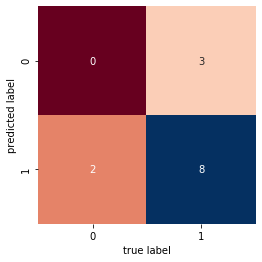


 Classification Report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.73      0.80      0.76        10

    accuracy                           0.62        13
   macro avg       0.36      0.40      0.38        13
weighted avg       0.56      0.62      0.59        13

Accuracy:  0.6153846153846154
Precision Score:  0.7272727272727273
Recall Score:  0.8
F1 Score:  0.761904761904762
AUC:  0.5666666666666667


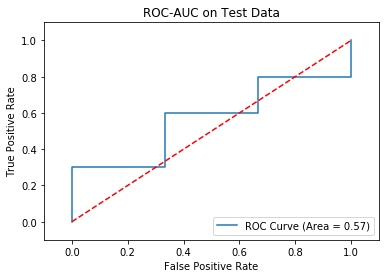

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

 Naive Bayes

 Confusion Matrix


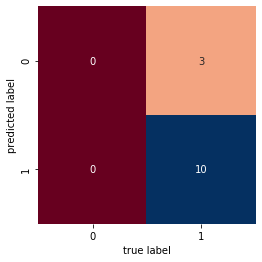


 Classification Report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.77      1.00      0.87        10

    accuracy                           0.77        13
   macro avg       0.38      0.50      0.43        13
weighted avg       0.59      0.77      0.67        13

Accuracy:  0.7692307692307693
Precision Score:  0.7692307692307693
Recall Score:  1.0
F1 Score:  0.8695652173913044
AUC:  0.4666666666666667


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


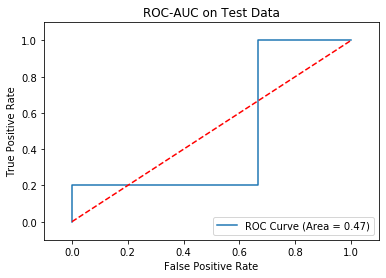

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

 Decision Tree

 Confusion Matrix


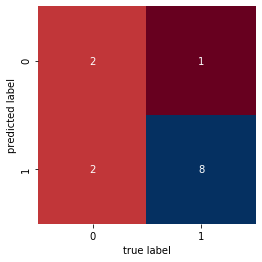


 Classification Report 

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.89      0.80      0.84        10

    accuracy                           0.77        13
   macro avg       0.69      0.73      0.71        13
weighted avg       0.80      0.77      0.78        13

Accuracy:  0.7692307692307693
Precision Score:  0.8888888888888888
Recall Score:  0.8
F1 Score:  0.8421052631578948
AUC:  0.7000000000000001


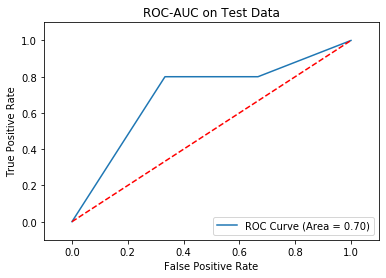

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

 Random Forest

 Confusion Matrix


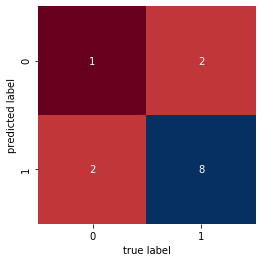


 Classification Report 

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.80      0.80      0.80        10

    accuracy                           0.69        13
   macro avg       0.57      0.57      0.57        13
weighted avg       0.69      0.69      0.69        13

Accuracy:  0.6923076923076923
Precision Score:  0.8
Recall Score:  0.8
F1 Score:  0.8000000000000002
AUC:  0.7333333333333334


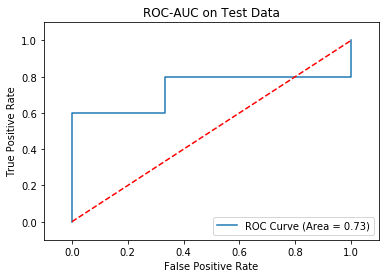

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

 Gradient Boosting

 Confusion Matrix


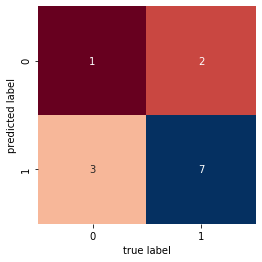


 Classification Report 

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.78      0.70      0.74        10

    accuracy                           0.62        13
   macro avg       0.51      0.52      0.51        13
weighted avg       0.66      0.62      0.63        13

Accuracy:  0.6153846153846154
Precision Score:  0.7777777777777778
Recall Score:  0.7
F1 Score:  0.7368421052631577
AUC:  0.6333333333333333


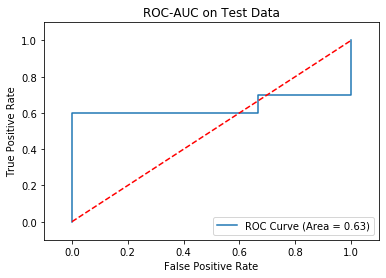

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------


In [25]:
model_data(X_train, X_test, Y_train, Y_test)

#### Hyperparameter tuning

In [26]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

In [27]:
#Creating a grid of hyperparameters
grid_params = {'n_estimators' : [100,200,300,400, 500],
               'learning_rate' : [0.1, 0.05, 0.2, 0.15, 0.095]}

GBC = GradientBoostingClassifier()
#Building a 5 fold CV GridSearchCV object
grid_object = GridSearchCV(estimator = GBC, param_grid = grid_params, scoring = 'roc_auc', cv = 5)

#Fitting the grid to the training data
grid_object.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2, 0.15, 0.095],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='roc_auc')

Best Parameters :  {'learning_rate': 0.05, 'n_estimators': 400}
Best_ROC-AUC :  64.69
Best model :  GradientBoostingClassifier(learning_rate=0.05, n_estimators=400)

 Confusion Matrix


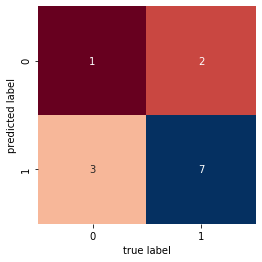


 Classification Report 

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.78      0.70      0.74        10

    accuracy                           0.62        13
   macro avg       0.51      0.52      0.51        13
weighted avg       0.66      0.62      0.63        13

Accuracy:  0.6153846153846154
Precision Score:  0.7777777777777778
Recall Score:  0.7
F1 Score:  0.7368421052631577
AUC:  0.6000000000000001


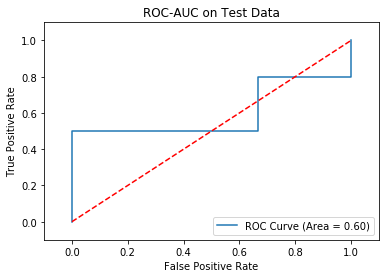

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
Cross Validation Accuracy :  6.67
Cross Validation Accuracy in every fold :  [20.  0.  0.]


In [28]:
#Extracting the best parameters and score
print("Best Parameters : ", grid_object.best_params_)
print("Best_ROC-AUC : ", round(grid_object.best_score_ * 100, 2))
print("Best model : ", grid_object.best_estimator_)

#Applying the tuned parameters back to the model
Y_pred = grid_object.best_estimator_.predict(X_test)
pred_prob = grid_object.best_estimator_.predict_proba(X_test)
classif_report(Y_test, Y_pred, pred_prob)

kfold = KFold(n_splits=3, random_state=25, shuffle=True)
results = cross_val_score(grid_object.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)